In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Before running the code please upload the required data set.
df = pd.read_csv('wine_data.csv')

In [4]:
# Question 1
most_frequent_quality = df['quality'].mode().iloc[0]
print('Most frequently occurring wine quality :',most_frequent_quality)

highest = df['quality'].max()
lowest = df['quality'].min()

print('Highest number in the quality :', highest)
print('Lowest number in the quality :', lowest)

Most frequently occurring wine quality : 5
Highest number in the quality : 8
Lowest number in the quality : 3


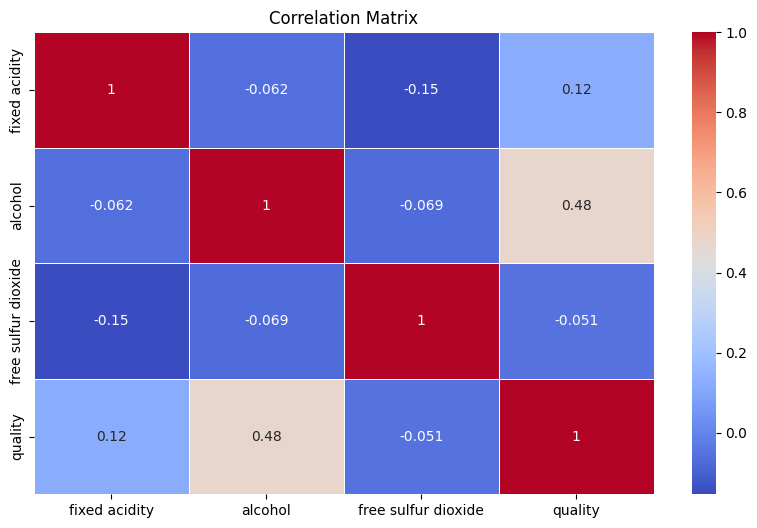


Interpretation and Conclusion : 
As the value of the Correlation coefficient between the variables fixed acidity and quality is 0.12405164911322257, it represents a Weak Correlation which suggests a faint relationship in the positive direction that might not be practically significant.
As the value of the Correlation coefficient between the variables free sulfur dioxide and quality is -0.05065605724427594, , it represents a Weak Correlation which suggests a faint relationship in the negative direction that might not be practically significant.
As the value of the Correlation coefficient between the variables alcohol and quality is 0.4761663239995377, it represents a Moderate Correlation which suggests a faint relationship in the positive direction that might not be practically significant.


In [5]:
# Question 2
df_select = df[['fixed acidity','alcohol','free sulfur dioxide', 'quality']]
corr_matrix = df_select.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
print('\nInterpretation and Conclusion : ')
print(f'As the value of the Correlation coefficient between the variables fixed acidity and quality is {corr_matrix.loc["fixed acidity","quality"]}, it represents a Weak Correlation which suggests a faint relationship in the positive direction that might not be practically significant.')
print(f'As the value of the Correlation coefficient between the variables free sulfur dioxide and quality is {corr_matrix.loc["free sulfur dioxide","quality"]}, , it represents a Weak Correlation which suggests a faint relationship in the negative direction that might not be practically significant.')
print(f'As the value of the Correlation coefficient between the variables alcohol and quality is {corr_matrix.loc["alcohol","quality"]}, it represents a Moderate Correlation which suggests a faint relationship in the positive direction that might not be practically significant.')

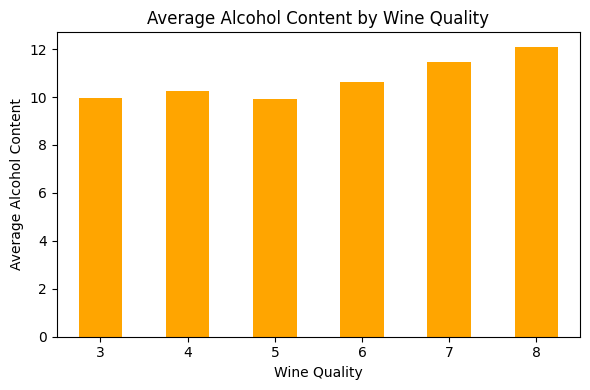


Interpretation and Conclusion : 
Here, we can clearly see that as the alcohol content increases in the wine the quality is at it maximum value. for low alcohol content the quality also deteriorate. But, exceptionally at Quality Number 5, there is a dip in alcohol content.


In [6]:
quality_alcohol_mean = df.groupby('quality')['alcohol'].mean()

# Plot the bar chart
plt.figure(figsize=(6, 4))
quality_alcohol_mean.plot(kind='bar', color='orange')
plt.xlabel('Wine Quality')
plt.ylabel('Average Alcohol Content')
plt.title('Average Alcohol Content by Wine Quality')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
print('\nInterpretation and Conclusion : ')
print('Here, we can clearly see that as the alcohol content increases in the wine the quality is at it maximum value. for low alcohol content the quality also deteriorate. But, exceptionally at Quality Number 5, there is a dip in alcohol content.')


In [7]:
# Question 3
quality_residual_sugar_mean = df.groupby('quality')['residual sugar'].mean()
print(quality_residual_sugar_mean)
print('\nConclusion: ')
print('For lowest quality wine, the Average residual sugar is :', quality_residual_sugar_mean.iloc[0])
print('For highest quality wine, the Average residual sugar is :', quality_residual_sugar_mean.iloc[5])

quality
3    2.635000
4    2.694340
5    2.528855
6    2.477194
7    2.720603
8    2.577778
Name: residual sugar, dtype: float64

Conclusion: 
For lowest quality wine, the Average residual sugar is : 2.6350000000000002
For highest quality wine, the Average residual sugar is : 2.5777777777777775


Correlation Coefficient between valatile acidity and quality:  -0.390557780264007




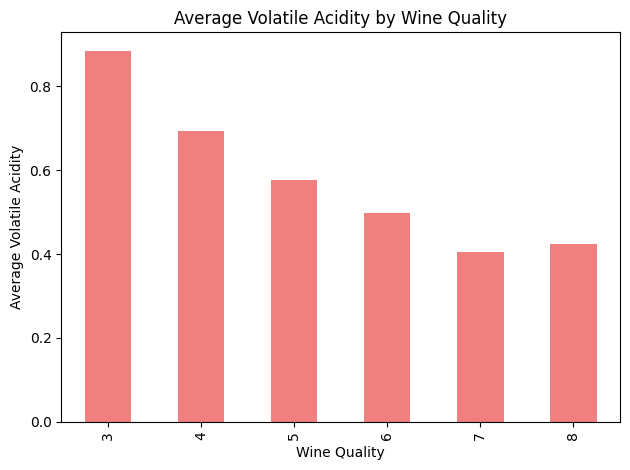


Interpretation and Conclusion : 
As the value of the Correlation coefficient between the variables free sulfur dioxide and quality is -0.390557780264007, , it represents a Weak Correlation which suggests a faint relationship in the negative direction that might not be practically significant.
The conclusion is as the volatile acidity increases, wine quality tends to decrease and vice-versa.


In [8]:
# Question 4
correlation = df['volatile acidity'].corr(df['quality'])
print("Correlation Coefficient between valatile acidity and quality: ",correlation)
print("\n")

avg_va = df.groupby('quality')['volatile acidity'].mean()
avg_va.plot(kind='bar', color='lightcoral')
plt.xlabel('Wine Quality')
plt.ylabel('Average Volatile Acidity')
plt.title('Average Volatile Acidity by Wine Quality')
plt.tight_layout()
plt.show()
print('\nInterpretation and Conclusion : ')
print('As the value of the Correlation coefficient between the variables free sulfur dioxide and quality is -0.390557780264007, , it represents a Weak Correlation which suggests a faint relationship in the negative direction that might not be practically significant.')
print('The conclusion is as the volatile acidity increases, wine quality tends to decrease and vice-versa.')

In [59]:
# Question 5
# Decesion Tree Model
# Making Feature Matrix and Dependen Variable Matrix
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Scaling the Training and Test data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the Decesion Tree Model
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[5 6]
 [5 5]
 [7 7]
 [5 6]
 [5 5]
 [6 6]
 [5 5]
 [6 6]
 [4 4]
 [5 5]
 [5 5]
 [5 5]
 [6 6]
 [4 5]
 [7 6]
 [6 6]
 [7 7]
 [4 5]
 [5 5]
 [4 4]
 [7 7]
 [6 6]
 [6 6]
 [4 4]
 [5 6]
 [5 5]
 [5 5]
 [6 7]
 [5 5]
 [6 6]
 [6 5]
 [6 6]
 [6 5]
 [5 6]
 [7 7]
 [7 7]
 [6 5]
 [3 6]
 [7 6]
 [6 7]
 [5 5]
 [6 7]
 [6 6]
 [7 6]
 [6 5]
 [5 5]
 [6 6]
 [6 6]
 [5 6]
 [6 5]
 [5 5]
 [5 5]
 [6 6]
 [6 6]
 [6 6]
 [5 5]
 [5 5]
 [5 5]
 [7 6]
 [6 5]
 [5 5]
 [7 6]
 [6 6]
 [6 6]
 [5 5]
 [6 6]
 [5 5]
 [5 5]
 [6 6]
 [6 6]
 [6 6]
 [6 6]
 [5 4]
 [6 6]
 [6 5]
 [6 6]
 [5 5]
 [5 5]
 [5 5]
 [7 6]
 [6 6]
 [5 5]
 [6 6]
 [7 6]
 [6 6]
 [6 5]
 [4 6]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [6 6]
 [6 4]
 [6 5]
 [5 7]
 [6 6]
 [6 6]
 [5 5]
 [5 6]
 [5 5]
 [7 8]
 [6 6]
 [6 6]
 [6 6]
 [5 5]
 [5 5]
 [5 5]
 [3 5]
 [6 7]
 [5 5]
 [6 6]
 [5 5]
 [8 7]
 [6 5]
 [5 6]
 [6 6]
 [6 6]
 [7 7]
 [6 6]
 [6 6]
 [5 5]
 [4 7]
 [5 5]
 [6 5]
 [7 6]
 [6 6]
 [5 5]
 [5 5]
 [6 5]
 [7 6]
 [4 6]
 [5 6]
 [5 6]
 [5 6]
 [6 6]
 [5 5]
 [6 6]
 [5 5]
 [7 8]
 [5 5]
 [6 6]
 [6 5]
 [6 6]

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('\n')
accuracy_score(y_test, y_pred)

[[  0   1   1   0   0   0]
 [  1   3   6   3   1   0]
 [  3  11 109  39   7   0]
 [  2   4  35 110  19   0]
 [  0   1   4  12  20   3]
 [  0   0   0   1   4   0]]




0.605

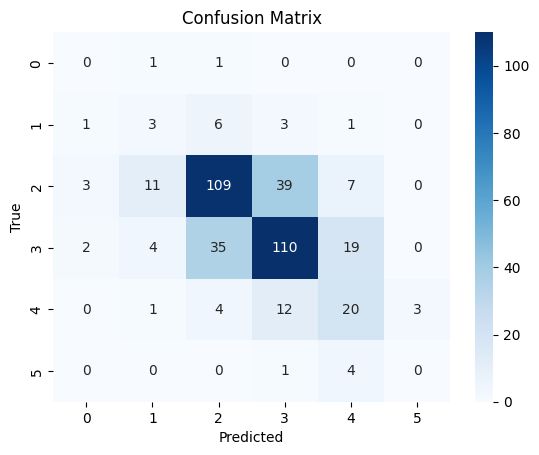

In [60]:
from sklearn.metrics import confusion_matrix

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

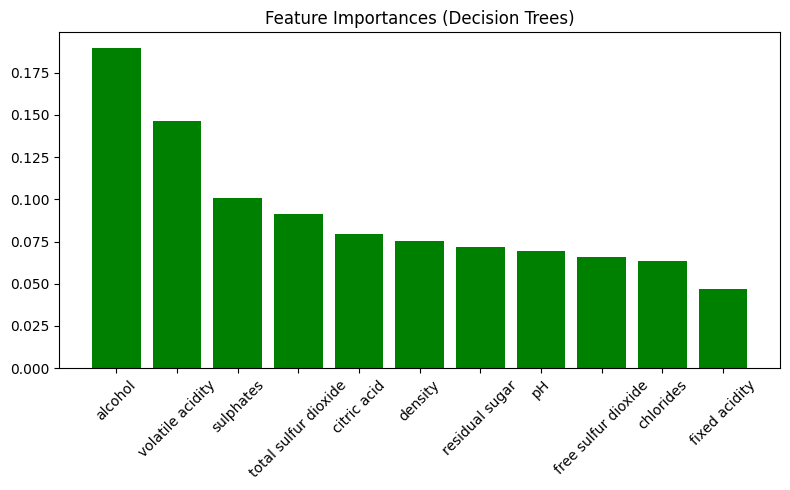

In [73]:
importances = classifier.feature_importances_
indices = np.argsort(importances)[::-1]
features = df.columns[:-1]  # exclude target column

plt.figure(figsize=(8, 5))
plt.title("Feature Importances (Decision Trees)")
plt.bar(range(len(importances)), importances[indices], color="green", align="center")
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()

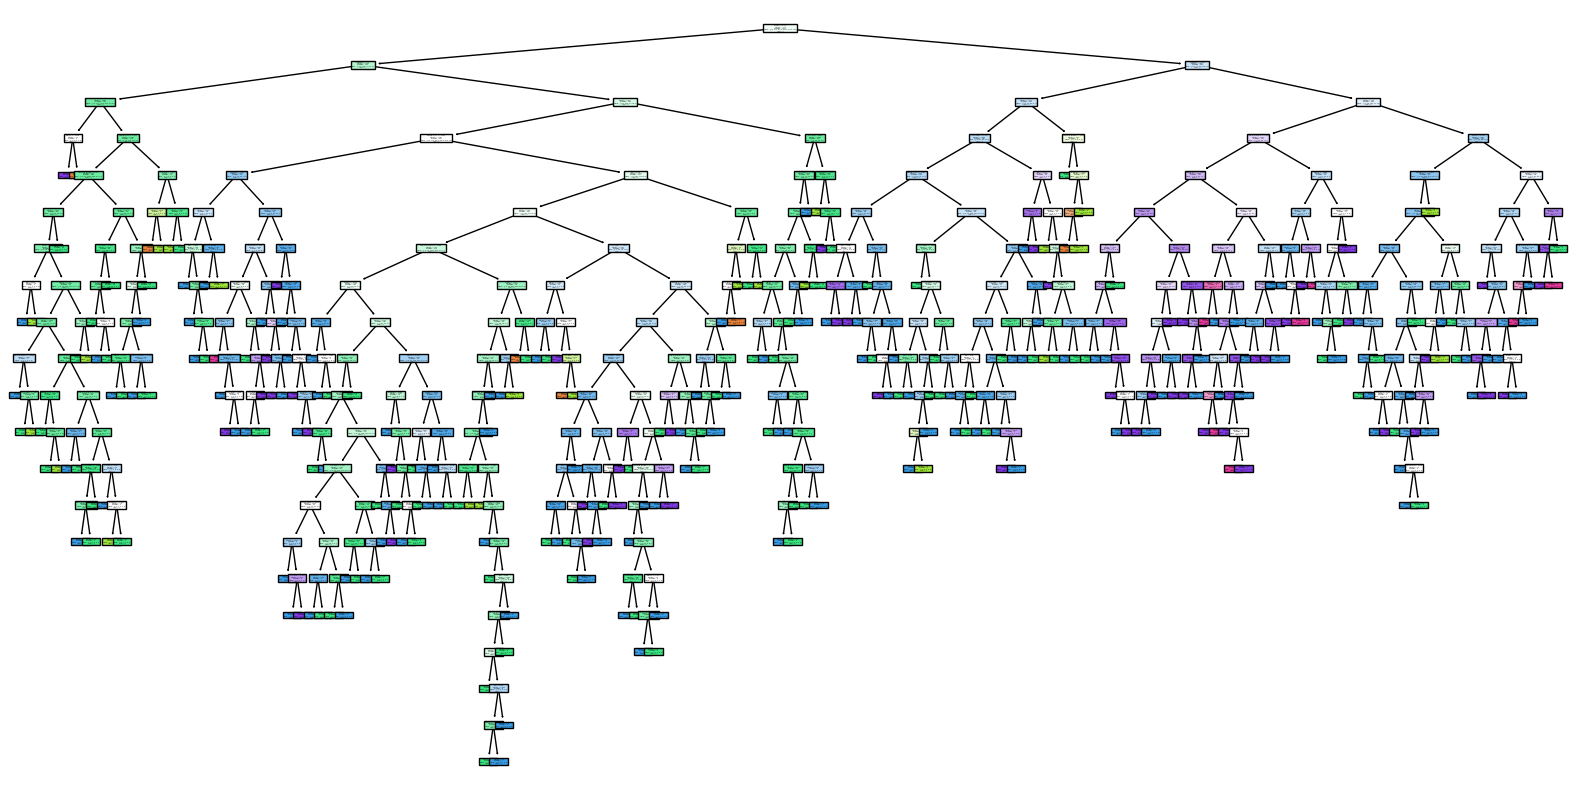

In [13]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
# Pass the column names from the original DataFrame df to the feature_names argument
plot_tree(classifier, feature_names=df.columns[:-1], class_names=[str(i) for i in sorted(df['quality'].unique())], filled=True)
plt.show()

<ipython-input-49-15bdd05ac206>:36: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green', 'blue', 'cyan', 'magenta', 'yellow'))(i), label = j) # Adjust cmap for multiple classes


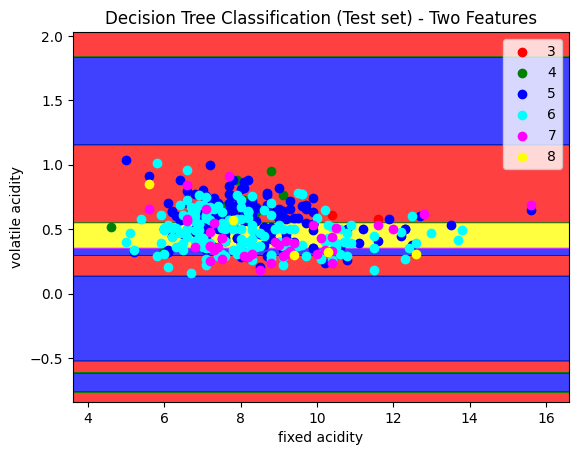

In [49]:

X_1 = df.iloc[:, [0, 1]].values # Using only the first two columns (features)
y_1 = df.iloc[:, -1].values

# Splitting the dataset
from sklearn.model_selection import train_test_split
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size = 0.25, random_state = 0)

# Scaling the Training and Test data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_1_train = sc.fit_transform(X_1_train)
X_1_test = sc.transform(X_1_test)

# Training the Decesion Tree Model
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_1_train, y_1_train)

# Continue with the rest of the plotting code
from matplotlib.colors import ListedColormap

# Create the meshgrid using the two selected features from the scaled test set
# Use slightly different bounds for the meshgrid to better encompass the data
X_set, y_set = sc.inverse_transform(X_1_test), y_1_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue', 'cyan', 'magenta', 'yellow'))) # Adjust cmap for multiple classes

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot the test data points
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green', 'blue', 'cyan', 'magenta', 'yellow'))(i), label = j) # Adjust cmap for multiple classes

plt.title('Decision Tree Classification (Test set) - Two Features')
plt.xlabel(df.columns[0]) # Use the actual column names
plt.ylabel(df.columns[1]) # Use the actual column names
plt.legend()
plt.show()

<ipython-input-48-80ba59a29d45>:36: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green', 'blue', 'cyan', 'magenta', 'yellow'))(i), label = j) # Adjust cmap for multiple classes


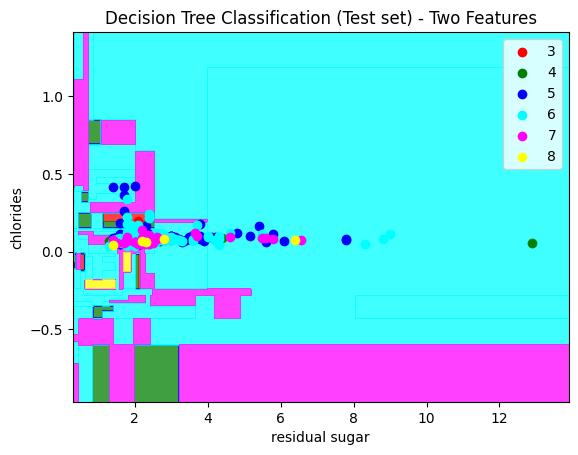

In [48]:
X_1 = df.iloc[:, [3, 4]].values # Using only the first two columns (features)
y_1 = df.iloc[:, -1].values

# Splitting the dataset
from sklearn.model_selection import train_test_split
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size = 0.25, random_state = 0)

# Scaling the Training and Test data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_1_train = sc.fit_transform(X_1_train)
X_1_test = sc.transform(X_1_test)

# Training the Decesion Tree Model
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_1_train, y_1_train)

# Continue with the rest of the plotting code
from matplotlib.colors import ListedColormap

# Create the meshgrid using the two selected features from the scaled test set
# Use slightly different bounds for the meshgrid to better encompass the data
X_set, y_set = sc.inverse_transform(X_1_test), y_1_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue', 'cyan', 'magenta', 'yellow'))) # Adjust cmap for multiple classes

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot the test data points
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green', 'blue', 'cyan', 'magenta', 'yellow'))(i), label = j) # Adjust cmap for multiple classes

plt.title('Decision Tree Classification (Test set) - Two Features')
plt.xlabel(df.columns[3]) # Use the actual column names
plt.ylabel(df.columns[4]) # Use the actual column names
plt.legend()
plt.show()

<ipython-input-47-37a0f8d7fb2e>:36: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green', 'blue', 'cyan', 'magenta', 'yellow'))(i), label = j) # Adjust cmap for multiple classes


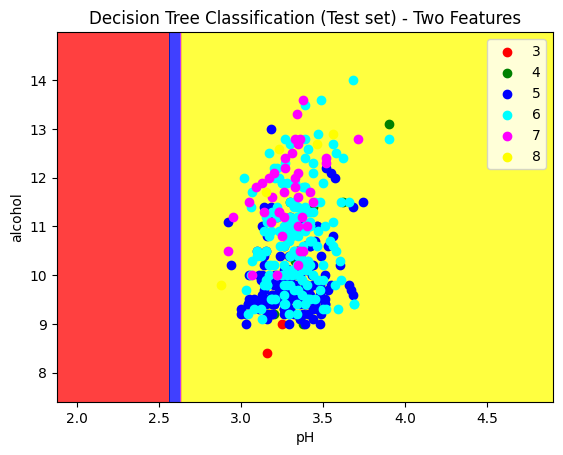

In [47]:
X_1 = df.iloc[:, [8, 10]].values # Using only the first two columns (features)
y_1 = df.iloc[:, -1].values

# Splitting the dataset
from sklearn.model_selection import train_test_split
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size = 0.25, random_state = 0)

# Scaling the Training and Test data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_1_train = sc.fit_transform(X_1_train)
X_1_test = sc.transform(X_1_test)

# Training the Decesion Tree Model
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_1_train, y_1_train)

# Continue with the rest of the plotting code
from matplotlib.colors import ListedColormap

# Create the meshgrid using the two selected features from the scaled test set
# Use slightly different bounds for the meshgrid to better encompass the data
X_set, y_set = sc.inverse_transform(X_1_test), y_1_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue', 'cyan', 'magenta', 'yellow'))) # Adjust cmap for multiple classes

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot the test data points
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green', 'blue', 'cyan', 'magenta', 'yellow'))(i), label = j) # Adjust cmap for multiple classes

plt.title('Decision Tree Classification (Test set) - Two Features')
plt.xlabel(df.columns[8]) # Use the actual column names
plt.ylabel(df.columns[10]) # Use the actual column names
plt.legend()
plt.show()

In [69]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_train, y_train)
y_pred_rf = classifier_rf.predict(X_test)
print(np.concatenate((y_pred_rf.reshape(len(y_pred_rf),1), y_test.reshape(len(y_test),1)),1))

[[6 6]
 [5 5]
 [7 7]
 [5 6]
 [5 5]
 [6 6]
 [5 5]
 [6 6]
 [5 4]
 [5 5]
 [5 5]
 [5 5]
 [6 6]
 [6 5]
 [6 6]
 [7 6]
 [7 7]
 [5 5]
 [5 5]
 [5 4]
 [6 7]
 [5 6]
 [6 6]
 [7 4]
 [5 6]
 [5 5]
 [5 5]
 [7 7]
 [5 5]
 [6 6]
 [6 5]
 [6 6]
 [6 5]
 [5 6]
 [7 7]
 [7 7]
 [5 5]
 [5 6]
 [6 6]
 [6 7]
 [5 5]
 [6 7]
 [6 6]
 [7 6]
 [6 5]
 [5 5]
 [5 6]
 [6 6]
 [5 6]
 [6 5]
 [5 5]
 [5 5]
 [6 6]
 [6 6]
 [6 6]
 [5 5]
 [5 5]
 [5 5]
 [7 6]
 [6 5]
 [5 5]
 [6 6]
 [6 6]
 [6 6]
 [5 5]
 [6 6]
 [5 5]
 [5 5]
 [7 6]
 [6 6]
 [5 6]
 [5 6]
 [5 4]
 [5 6]
 [6 5]
 [6 6]
 [5 5]
 [5 5]
 [5 5]
 [7 6]
 [6 6]
 [5 5]
 [6 6]
 [6 6]
 [6 6]
 [5 5]
 [6 6]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [6 6]
 [6 4]
 [5 5]
 [7 7]
 [5 6]
 [6 6]
 [5 5]
 [5 6]
 [6 5]
 [7 8]
 [6 6]
 [6 6]
 [6 6]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [6 7]
 [5 5]
 [6 6]
 [5 5]
 [8 7]
 [5 5]
 [6 6]
 [6 6]
 [5 6]
 [7 7]
 [6 6]
 [6 6]
 [5 5]
 [6 7]
 [5 5]
 [5 5]
 [6 6]
 [7 6]
 [5 5]
 [5 5]
 [6 5]
 [7 6]
 [5 6]
 [5 6]
 [6 6]
 [6 6]
 [6 6]
 [5 5]
 [6 6]
 [5 5]
 [6 8]
 [5 5]
 [6 6]
 [5 5]
 [5 6]

In [70]:
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)
accuracy_score(y_test, y_pred_rf)

[[  0   0   0   2   0   0]
 [  0   0  10   3   1   0]
 [  0   0 130  37   2   0]
 [  0   0  37 117  16   0]
 [  0   0   2  13  23   2]
 [  0   0   0   2   3   0]]


0.675

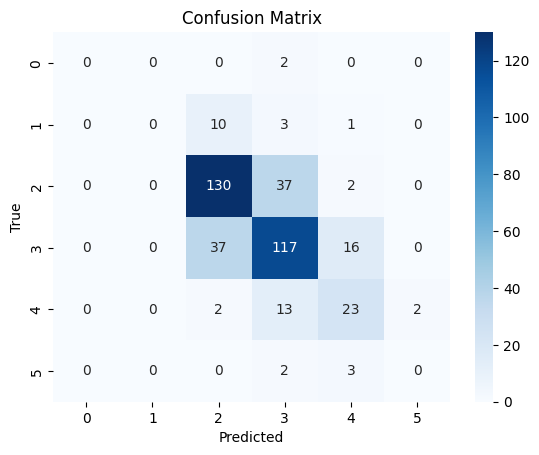

In [71]:
from sklearn.metrics import confusion_matrix

y_pred = classifier_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


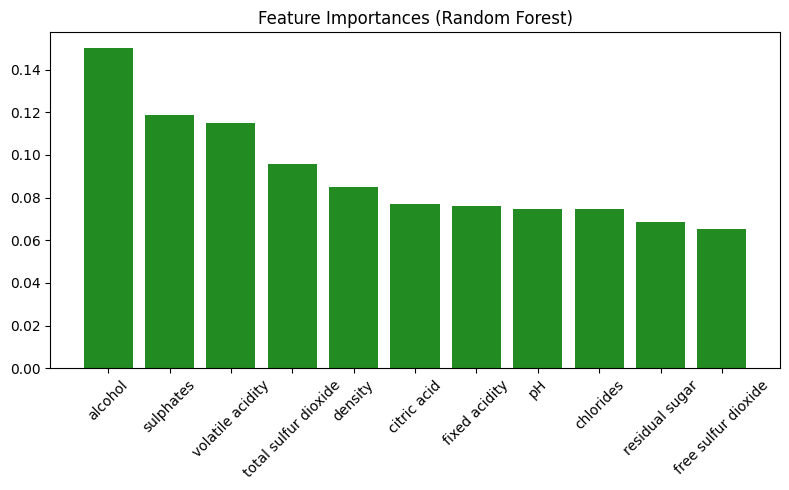

In [72]:

importances = classifier_rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = df.columns[:-1]  # exclude target column

plt.figure(figsize=(8, 5))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(len(importances)), importances[indices], color="forestgreen", align="center")
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-76-ce6fa5a78992>:36: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green', 'blue', 'cyan', 'magenta', 'yellow'))(i), label = j) # Adjust cmap for multiple classes


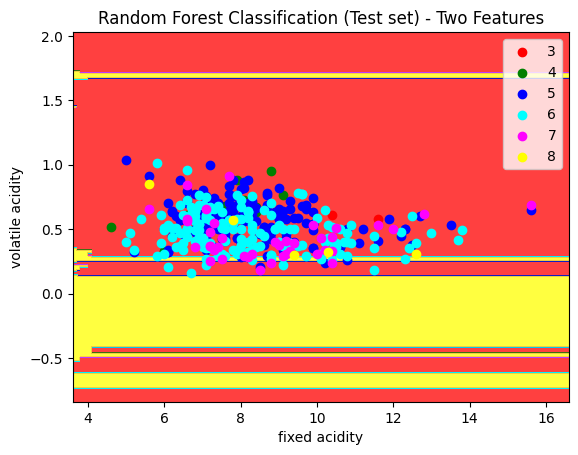

In [76]:
X_1 = df.iloc[:, [0, 1]].values # Using only the first two columns (features)
y_1 = df.iloc[:, -1].values

# Splitting the dataset
from sklearn.model_selection import train_test_split
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size = 0.25, random_state = 0)

# Scaling the Training and Test data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_1_train = sc.fit_transform(X_1_train)
X_1_test = sc.transform(X_1_test)

# Training the Decesion Tree Model
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_1_train, y_1_train)

# Continue with the rest of the plotting code
from matplotlib.colors import ListedColormap

# Create the meshgrid using the two selected features from the scaled test set
# Use slightly different bounds for the meshgrid to better encompass the data
X_set, y_set = sc.inverse_transform(X_1_test), y_1_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier_rf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue', 'cyan', 'magenta', 'yellow'))) # Adjust cmap for multiple classes

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot the test data points
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green', 'blue', 'cyan', 'magenta', 'yellow'))(i), label = j) # Adjust cmap for multiple classes

plt.title('Random Forest Classification (Test set) - Two Features')
plt.xlabel(df.columns[0]) # Use the actual column names
plt.ylabel(df.columns[1]) # Use the actual column names
plt.legend()
plt.show()

<ipython-input-77-51774aa6a3e3>:36: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green', 'blue', 'cyan', 'magenta', 'yellow'))(i), label = j) # Adjust cmap for multiple classes


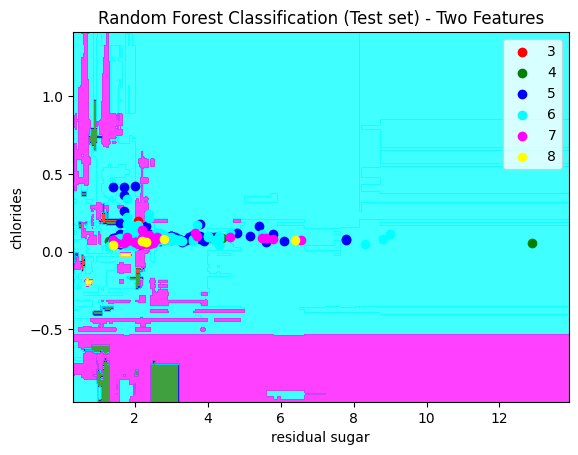

In [77]:
X_1 = df.iloc[:, [3, 4]].values # Using only the first two columns (features)
y_1 = df.iloc[:, -1].values

# Splitting the dataset
from sklearn.model_selection import train_test_split
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size = 0.25, random_state = 0)

# Scaling the Training and Test data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_1_train = sc.fit_transform(X_1_train)
X_1_test = sc.transform(X_1_test)

# Training the Decesion Tree Model
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_1_train, y_1_train)

# Continue with the rest of the plotting code
from matplotlib.colors import ListedColormap

# Create the meshgrid using the two selected features from the scaled test set
# Use slightly different bounds for the meshgrid to better encompass the data
X_set, y_set = sc.inverse_transform(X_1_test), y_1_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier_rf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue', 'cyan', 'magenta', 'yellow'))) # Adjust cmap for multiple classes

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot the test data points
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green', 'blue', 'cyan', 'magenta', 'yellow'))(i), label = j) # Adjust cmap for multiple classes

plt.title('Random Forest Classification (Test set) - Two Features')
plt.xlabel(df.columns[3]) # Use the actual column names
plt.ylabel(df.columns[4]) # Use the actual column names
plt.legend()
plt.show()

<ipython-input-78-f241f867664d>:36: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green', 'blue', 'cyan', 'magenta', 'yellow'))(i), label = j) # Adjust cmap for multiple classes


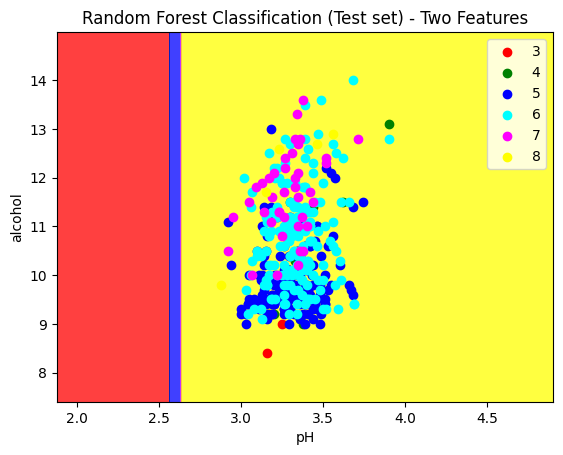

In [78]:
X_1 = df.iloc[:, [8, 10]].values # Using only the first two columns (features)
y_1 = df.iloc[:, -1].values

# Splitting the dataset
from sklearn.model_selection import train_test_split
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size = 0.25, random_state = 0)

# Scaling the Training and Test data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_1_train = sc.fit_transform(X_1_train)
X_1_test = sc.transform(X_1_test)

# Training the Decesion Tree Model
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_1_train, y_1_train)

# Continue with the rest of the plotting code
from matplotlib.colors import ListedColormap

# Create the meshgrid using the two selected features from the scaled test set
# Use slightly different bounds for the meshgrid to better encompass the data
X_set, y_set = sc.inverse_transform(X_1_test), y_1_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier_rf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue', 'cyan', 'magenta', 'yellow'))) # Adjust cmap for multiple classes

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot the test data points
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green', 'blue', 'cyan', 'magenta', 'yellow'))(i), label = j) # Adjust cmap for multiple classes

plt.title('Random Forest Classification (Test set) - Two Features')
plt.xlabel(df.columns[8]) # Use the actual column names
plt.ylabel(df.columns[10]) # Use the actual column names
plt.legend()
plt.show()